<a href="https://colab.research.google.com/github/Radityaprama/Oil-Gas-Sensor-Anomaly/blob/main/Oil_Gas_Sensor_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plant_sensor_data.csv to plant_sensor_data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['plant_sensor_data.csv']))

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [ ]:
print(data.columns)

Index(['timestamp', 'temperature', 'pressure', 'flow_rate', 'vibration_level',
       'valve_position', 'motor_speed', 'chemical_concentration',
       'anomaly_label'],
      dtype='object')


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['pressure', 'temperature', 'flow_rate']])

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(scaled_data)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
data['anomaly_pred'] = model.predict(scaled_data)
data['anomaly_pred'] = data['anomaly_pred'].map({1: 0, -1: 1})

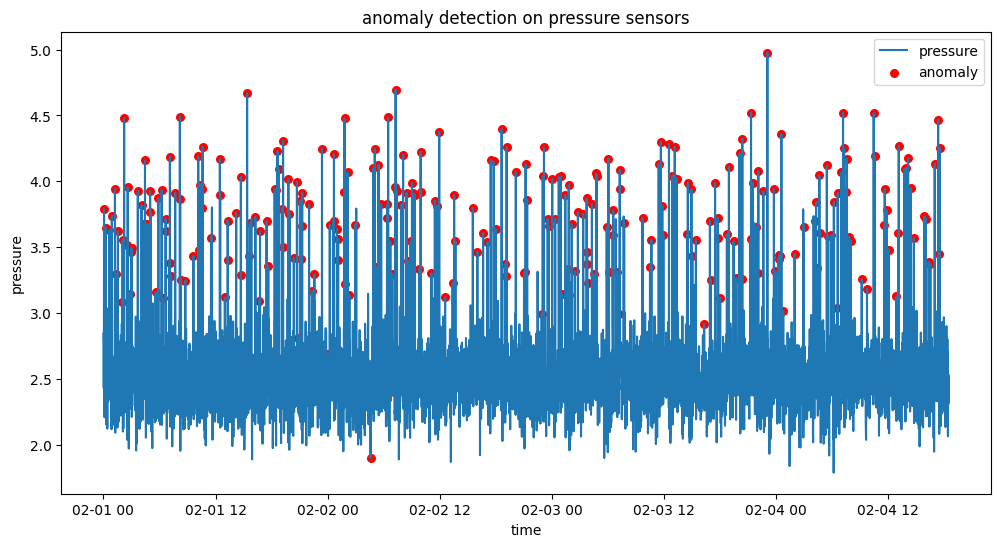

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['pressure'], label='pressure')
plt.scatter(data['timestamp'][data['anomaly_pred'] == 1],
            data['pressure'][data['anomaly_pred'] == 1],
            color='red', label='anomaly', s=30)
plt.title('anomaly detection on pressure sensors')
plt.xlabel('time')
plt.ylabel('pressure')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data['anomaly_label'], data['anomaly_pred']))
print(classification_report(data['anomaly_label'], data['anomaly_pred']))


[[5145    1]
 [  15  271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5146
           1       1.00      0.95      0.97       286

    accuracy                           1.00      5432
   macro avg       1.00      0.97      0.98      5432
weighted avg       1.00      1.00      1.00      5432



In [ ]:
data.to_csv('anomaly detection results.csv', index=False)
